# Dimensionality Reduction 

- Pengurangan dimensi dari features yang digunakan membentuk model
- Teknik PCA (Principal Component Anaysis)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [40]:
dataIris = load_iris()
dir(dataIris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [41]:
df = pd.DataFrame(
    dataIris['data'],
    columns = ['SL','SW','PL','PW'] # dataIris['feature_names']
)
df['target'] = dataIris['target']
df['spesies'] = df['target'].apply( lambda x : dataIris['target_names'][x])
df.head()

,SL,SW,PL,PW,target,spesies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


### A. PCA Manual

1. Standardize data features
$$ \displaystyle Z_\textrm{score} = \frac {x - \bar{x}}{s}$$
2. Find Covariance Matrix
$$ \displaystyle cov(x,y) = \frac {\sum (x - \bar{x})(y - \bar{y})}{n-1}  $$
3. Find Eigen Values ($\lambda$) & Eigen Vectors ($v$)
$$ \displaystyle X v = \lambda v  $$
4. Choose Principal Components

In [42]:
dfA = df.copy()

In [43]:
# Step 1. Standardize

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ss = scaler.fit_transform(df[['SL','SW','PL','PW']])

dfA['SSL'] =ss[:,0]
dfA['SSW'] =ss[:,1]
dfA['SPL'] =ss[:,2]
dfA['SPW'] =ss[:,3]

dfA.head()

,SL,SW,PL,PW,target,spesies,SSL,SSW,SPL,SPW
0,5.1,3.5,1.4,0.2,0,setosa,-0.900681,1.019004,-1.340227,-1.315444
1,4.9,3.0,1.4,0.2,0,setosa,-1.143017,-0.131979,-1.340227,-1.315444
2,4.7,3.2,1.3,0.2,0,setosa,-1.385353,0.328414,-1.397064,-1.315444
3,4.6,3.1,1.5,0.2,0,setosa,-1.506521,0.098217,-1.283389,-1.315444
4,5.0,3.6,1.4,0.2,0,setosa,-1.021849,1.249201,-1.340227,-1.315444


In [44]:
# 2. Covariance Matrix from standardized features

covmat = dfA[['SSL','SSW','SPL','SPW']].cov()
covmat

,SSL,SSW,SPL,SPW
SSL,1.006711,-0.118359,0.877604,0.823431
SSW,-0.118359,1.006711,-0.431316,-0.368583
SPL,0.877604,-0.431316,1.006711,0.969328
SPW,0.823431,-0.368583,0.969328,1.006711


In [45]:
# Notes
# covariance antara sesama SSL, SSW, SPL,SPW = variance
# jika Covariance (x,x) = 1 maka disebut correlation matrix
np.std(dfA['SSL'],ddof=1) ** 2

1.006711409395973

In [46]:
# 3. Find Eigen Values & Eigen Vector from covariance Matrix
# a,b = np.linalg.eig(matrix) : akan mereturn 2 buah nilai, eigen values dan eigen vector

eigVal, eigVec = np.linalg.eig(covmat)
print(eigVal)
print(eigVec)

[2.93808505 0.9201649  0.14774182 0.02085386]
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [47]:
# Eigen Value menunjukan persentase keterwakilan feature asli dari feature bayangan yang dibuat
# Eigen Vector merupakan principle Component (dot product dengan x yang sudah di standardisasi)

# 4 Feature Asli
# PCA => 4 feature bayngan  -> EignVec. X standardisasi

#misal saya akan pakai 2 pc = pc1 + pc2
(eigVal[1]+eigVal[0])/ eigVal.sum()

# dari sini kita tahu bahwa : penggunaan 2 feature PC sudah mewakili 95.8% feature ori

0.9581320720000163

In [51]:
# 4 Choose PC

# berdasarkan perhitungan diatas dipilih PC1 + PC2 karena telah wakili 95,8%
# Eigen Vector perlu dilakukan transpose terlebih dahulu

PC1 = dfA[['SSL','SSW','SPL','SPW']].dot(eigVec.T[0]) * 1
PC2 = dfA[['SSL','SSW','SPL','SPW']].dot(eigVec.T[1]) * -1

In [52]:
dfPC = pd.DataFrame(
    {'pc1': PC1, 'pc2':PC2}
)
dfPC['target'] = dfA['target'].copy()
dfPC['spesies'] = dfA['spesies'].copy()
dfPC.head()

,pc1,pc2,target,spesies
0,-2.264703,0.480027,0,setosa
1,-2.080961,-0.674134,0,setosa
2,-2.364229,-0.341908,0,setosa
3,-2.299384,-0.597395,0,setosa
4,-2.389842,0.646835,0,setosa


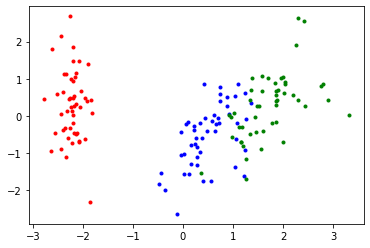

In [54]:
# Efek samping : hasil prediksi akan ada perbedaaan namun tidak signifikan,
# ibarat gambar terjadi pengungaran pixel walaupun blur namun tetap terlihat polanya

plt.plot(dfPC['pc1'][dfPC['target']==0], dfPC['pc2'][dfPC['target']==0], 'r.')
plt.plot(dfPC['pc1'][dfPC['target']==1], dfPC['pc2'][dfPC['target']==1], 'b.')
plt.plot(dfPC['pc1'][dfPC['target']==2], dfPC['pc2'][dfPC['target']==2], 'g.')
plt.show()

<hr>

### B. PCA Sklearn()

In [56]:
dfB = df.copy()

In [57]:
# 1. Standardize

scaler = StandardScaler()
xst = scaler.fit_transform(dfB[['SL','SW','PL','PW']])

In [75]:
# 2. PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(xst)

In [76]:
# di SK Learn bisa juga di cek
print(pca.n_components)
print(pca.explained_variance_ratio_)
print(np.sum((pca.explained_variance_ratio_)))

2
[0.72962445 0.22850762]
0.9581320720000164


In [78]:
dfPC2 = pd.DataFrame({
    'pc1' : pc[:,0] , 'pc2' : pc[:,1]
})
dfPC2['target'] = df['target'].copy()
dfPC2['spesies'] = df['spesies'].copy()
dfPC2.head()

,pc1,pc2,target,spesies
0,-2.264703,0.480027,0,setosa
1,-2.080961,-0.674134,0,setosa
2,-2.364229,-0.341908,0,setosa
3,-2.299384,-0.597395,0,setosa
4,-2.389842,0.646835,0,setosa


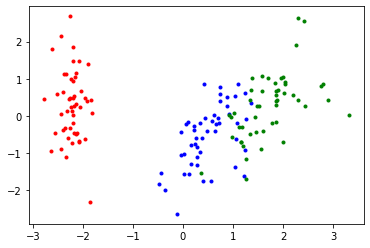

In [79]:
plt.plot(dfPC2['pc1'][dfPC2['target']==0], dfPC2['pc2'][dfPC2['target']==0], 'r.')
plt.plot(dfPC2['pc1'][dfPC2['target']==1], dfPC2['pc2'][dfPC2['target']==1], 'b.')
plt.plot(dfPC2['pc1'][dfPC2['target']==2], dfPC2['pc2'][dfPC2['target']==2], 'g.')
plt.show()